# Steady Plane Poiseuille Flow


The Navier Stokes equation obtained using Conservation of momentum can be written for horizontal components as below

$$
\rho\left(\frac{\partial u}{\partial t}+u \frac{\partial u}{\partial x}+v \frac{\partial u}{\partial y}\right)=-\frac{\partial p}{\partial x}+\mu\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}\right)
$$

No vertical motion of fluid is assumed

$$
v=0 
$$

At steady state the velocity profile obtains a form that doesn't vary with time thus time derivatives are equal to zero and 
The horizontal velocity is assumed to have same value throught for all values of x for a particular y at steady state which implies gradient of u w.r.t. x is 0.
Thus,

$$
\frac{\partial u}{\partial t}=0, \frac{\partial u}{\partial x}=0, v \frac{\partial u}{\partial y}=0, \frac{\partial^{2} u}{\partial x^{2}}=0
$$

Thus at steady state,

$$
\frac{\partial p}{\partial x}=\mu\left(\frac{\partial^{2} u}{\partial y^{2}}\right)
$$

The solution of the above equation is obtained for the 2D walled system below

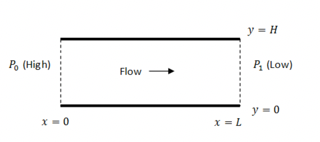

In [64]:
import numpy as np
import matplotlib.pyplot as plt

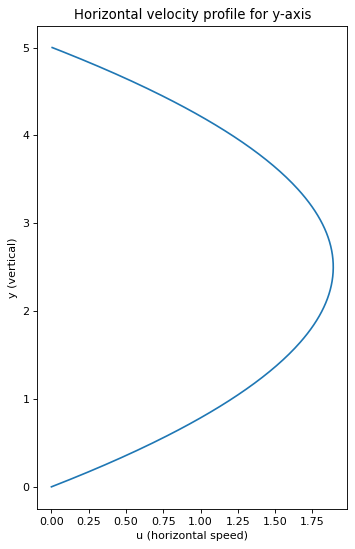

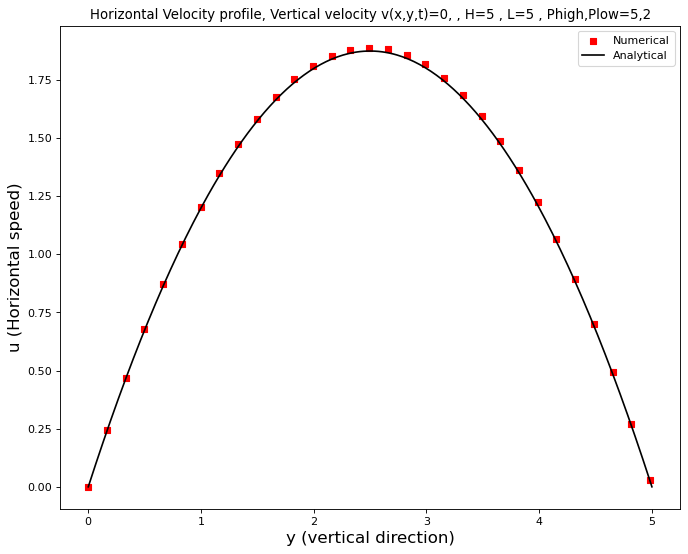

In [161]:
mu=1                #viscosity
Ph=5                #Pressure on the left boundary
Pl=2                #Pressure on the right boundary
L=5                 #Horizontal length 
pd=(Pl-Ph)/L        #Pressure gradient
H=5                 #Vertical height
ystep=300           #no of steps
dy=H/ystep          #stepsize

UD=np.arange(0.1,5.1,0.1,dtype=float)

udd=pd/mu

Z=[]
for uu in UD:
    u=0
    U=[u]
    UU=[uu]
    y=0
    while y<=H:
        uu=uu+(udd*dy)
        u=u+(uu*dy)
        U=U+[u]
        UU=UU+[uu]
        y=y+dy
    #plt.plot(U)
    #plt.show()
    Z=Z+[U[-1]]
    

ZZ=[i for i in Z if i>0]
p=UD[Z.index(np.min(ZZ))]

UD=np.arange(p-0.1,p,0.01,dtype=float)

Z=[]
for uu in UD:
    u=0
    U=[u]
    UU=[uu]
    y=0
    while y<=H:
        uu=uu+(udd*dy)
        u=u+(uu*dy)
        U=U+[u]
        UU=UU+[uu]
        y=y+dy
    #plt.plot(U)
    #plt.show()
    Z=Z+[U[-1]]


ZZ=[i for i in Z if i>0]
p=UD[Z.index(np.min(ZZ))]

UD=np.arange(p-0.01,p,0.001,dtype=float)

Z=[]
for uu in UD:
    u=0
    U=[u]
    UU=[uu]
    y=0
    while y<=H:
        uu=uu+(udd*dy)
        u=u+(uu*dy)
        U=U+[u]
        UU=UU+[uu]
        y=y+dy
    #plt.plot(U)
    #plt.show()
    Z=Z+[U[-1]]

ZZ=[i for i in Z if i>0]
uu=UD[Z.index(np.min(ZZ))]

u=0
U=[u]
UU=[uu]
y=0
while y<=H:
        uu=uu+(udd*dy)
        u=u+(uu*dy)
        U=U+[u]
        UU=UU+[uu]
        y=y+dy
xax=np.linspace(0,H,len(U)) 

plt.figure(figsize=(5,8),dpi=80)
plt.title('Horizontal velocity profile for y-axis')
plt.ylabel('y (vertical)')
plt.xlabel('u (horizontal speed)')
plt.plot(U,xax)
plt.show()

plt.figure(figsize=(10,8),dpi=80)
plt.scatter(xax[::10],U[::10],marker='s',color='r',label='Numerical')
#Analytical solution
xax=np.array(xax)
Uth=(pd/(2*mu))*(xax*(xax-H))
plt.plot(xax,Uth,color='black',label='Analytical')
plt.title(str('Horizontal Velocity profile, '+'Vertical velocity v(x,y,t)=0,'+' , H='+str(H)+' , L='+str(L)+' , Phigh,Plow='+str(Ph)+','+str(Pl)))
plt.xlabel('y (vertical direction)',fontsize=15)
plt.ylabel('u (Horizontal speed)',fontsize=15)
plt.legend()
    